# <B><center> Employee Attrition Problem</center></B>

## Company Description

Ai Robotics is a highly regarded company specializing in enterprise agile planning, DevOps, application security, application lifecycle management, and AI-powered analytics. By combining these strengths, the company delivers secure digital experiences that foster trust and confidence among its customers.

Ai Robotics extends its expertise by managing business processes for enterprise functions, including sourcing and procurement, finance and accounting, supply chain operations, as well as marketing and sales. By streamlining these functions on behalf of clients, the company helps organizations achieve greater efficiency and focus on their core business objectives.

## Problem Statement
To predict an employee's salary based on the 

information provided in the dataset.

### Business Perspective

Mr. Francis, the manager of Ai Robotics, is facing a pressing issue as employees are leaving the company for various reasons. Concerned about this trend, he decides to address the problem proactively. To find a solution, he hires Mr. Andrew, a skilled Data Scientist, and provides him with a comprehensive dataset for analysis.


### Dataset Description

Mr. Andrew is provided with three CSV files for his analysis:

- **emp_train_dataset**: Contains 100,000 rows and 8 columns.
- **emp_train_salaries**: Contains 100,000 rows and 2 columns.
- **emp_test_dataset**: Contains 100,000 rows and 8 columns.


### Columns Description

- **job_id**: Unique ID representing each employee.
- **companyid**: Unique ID representing the company.
- **jobType**: The position or role of the employee in the company.
- **degree**: The degree obtained by the employee.
- **major**: The field of specialization of the employee.
- **industry**: The industry in which the employee is working.
- **yearsExperience**: Total number of years of experience of the employee.
- **milesFromMetropolis**: The distance (in miles) between the employee’s residence and the company.
- **salary**: Employee's salary in $100k units (e.g., 250 represents $250,000).

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df1 = pd.read_csv('data/emp_train_dataset.csv')
df2 = pd.read_csv('data/emp_train_salaries.csv')

#### Show Top 5 records

In [5]:
df1.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
df2.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


#### Shape of Dataset

In [8]:
df1.shape, df2.shape

((1000000, 8), (1000000, 2))

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Checking Missing Values

In [10]:
df1.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [11]:
df2.isnull().sum()

jobId     0
salary    0
dtype: int64

Observation: There are no missing values in the dataset

#### Checking Duplicates

In [12]:
df1.duplicated().sum()

np.int64(0)

In [14]:
df2.duplicated().sum()

np.int64(0)

Observation: There are no duplicates in the dataset

#### Merge emp_train_dataset and emp_train_salaries

In [16]:
df = pd.merge(df1, df2, on='jobId')

In [17]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Check the datatype

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


#### Check the number of unique values of each column

In [20]:
df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

#### Check for Mathematical relations of the dataset like count, min, max, mean and standard deviation (i.e. the 5 number summary)

In [21]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


Insights:
- From the above description of numerical data, the means of yearsExperience and milesFromMetroplis is not quite far from the max value of the respective features. Only the salary features has a wide range of values.

Droping the 'jobId' and 'companyId' columns since it is not having much significance

In [22]:
df.drop('jobId', axis=1, inplace=True)
df.drop('companyId', axis=1, inplace=True)

In [23]:
df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Exploring Data

In [25]:
print("Categories in the jobType column: ", df['jobType'].unique(), end = " ")
print("\n")
print("\nCategories in the degree column: ", df['degree'].unique(), end = " ")
print("\n")
print("\nCategories in the major column: ", df['major'].unique(), end = " ")
print("\n")
print("\nCategories in the industry column: ", df['industry'].unique(), end = " ")

Categories in the jobType column:  ['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR'] 


Categories in the degree column:  ['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE'] 


Categories in the major column:  ['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING'] 


Categories in the industry column:  ['HEALTH' 'WEB' 'AUTO' 'FINANCE' 'EDUCATION' 'OIL' 'SERVICE'] 

### Define Categorical and Numerical columns

In [32]:
num_cols = [feature for feature in df.columns if df[feature].dtypes != 'O']
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(num_cols)
print("\n")
print(cat_cols)

['yearsExperience', 'milesFromMetropolis', 'salary']


['jobType', 'degree', 'major', 'industry']


### Correlation Matrix

Correlation matrix allows us to understand the relationship between different features of the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

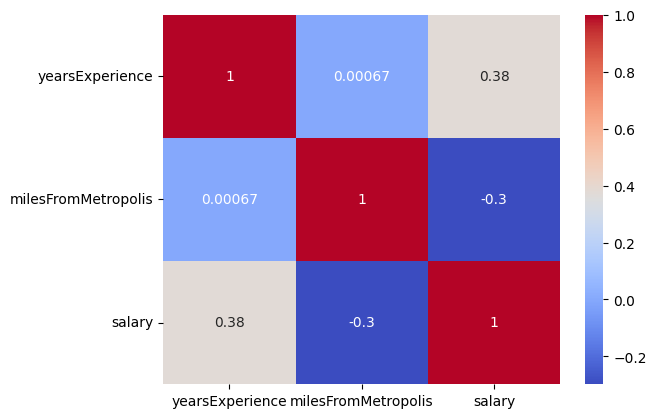

In [37]:
plt.Figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show

From the above matrix, it can be said that
- yearsExperience and salary are positively correlated
- yearsExperience and milesFromMetropolis are positively yet slightly correlated
- milesFromMetropolis and salary are negatively correlated

### Chi-Square Test

The Chi-Square test is used to test the independence between two categorical variables.

In [38]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(df, feature1, feature2):

    contingency_table = pd.crosstab(df[feature1], df[feature2])

    # Observed Values
    observed_values = contingency_table.values

    # Expected Values
    _, _, _, expected_values = chi2_contingency(contingency_table)

    # Degrees of Freedom
    no_of_rows = len(contingency_table.iloc[0:, 0])
    no_of_columns = len(contingency_table.iloc[0, 0:])
    deg_f = (no_of_rows - 1) * (no_of_columns - 1)

    print("Degrees of Freedom: ", deg_f)

    # Significance Level 5%
    alpha = 0.05
    print("Significance Level: ", alpha)

    # Chi-Square Statistic
    chi_square = sum([(o-e)**2./e for o, e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]

    print("Chi-Square Statistic: ", chi_square_statistic)

    # Critical Value
    critical_value = chi2.ppf(1-alpha, deg_f)
    print("Critical Value: ", critical_value)

    # P-Value
    p_value = 1-chi2.cdf(x = chi_square_statistic, df = deg_f)

    print("P-Value: ", p_value)

    if chi_square_statistic >= critical_value:
        print("Reject H0, there is a relationship between the two categorical variables.")
    else:
        print("Retain H0, there is no relationship between the two categorical variables.")


    if p_value <= alpha:
        print("Reject H0, there is a relationship between the two categorical variables.")
    else:
        print("Retain H0, there is no relationship between the two categorical variables.")

In [41]:
### looping on categorical data and use function for performing chi-square test
for x in cat_cols:
    for i in cat_cols:
        if i != x:
            print("Chi-Square Test between {} and {}".format(x, i))
            chi_square_test(df, x, i)
            print('\n')
            print("====================================================="*2)
            print('\n')

Chi-Square Test between jobType and degree
Degrees of Freedom:  28
Significance Level:  0.05
Chi-Square Statistic:  50117.72406771936
Critical Value:  41.33713815142739
P-Value:  0.0
Reject H0, there is a relationship between the two categorical variables.
Reject H0, there is a relationship between the two categorical variables.




Chi-Square Test between jobType and major
Degrees of Freedom:  56
Significance Level:  0.05
Chi-Square Statistic:  16703.025256041707
Critical Value:  74.46832415930936
P-Value:  0.0
Reject H0, there is a relationship between the two categorical variables.
Reject H0, there is a relationship between the two categorical variables.




Chi-Square Test between jobType and industry
Degrees of Freedom:  42
Significance Level:  0.05
Chi-Square Statistic:  14.913329934821567
Critical Value:  58.12403768086803
P-Value:  0.9999643570205455
Retain H0, there is no relationship between the two categorical variables.
Retain H0, there is no relationship between the two ca

### Exploratory Data Analysis (Visualization)

#### Box Plot

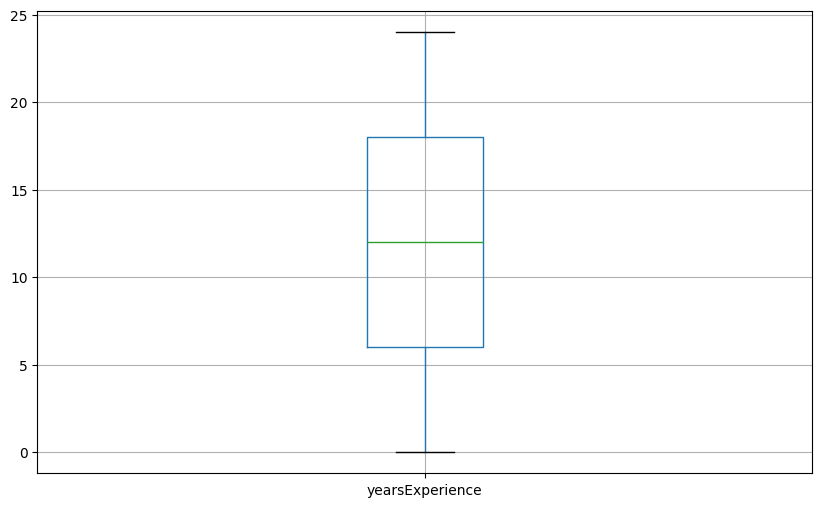

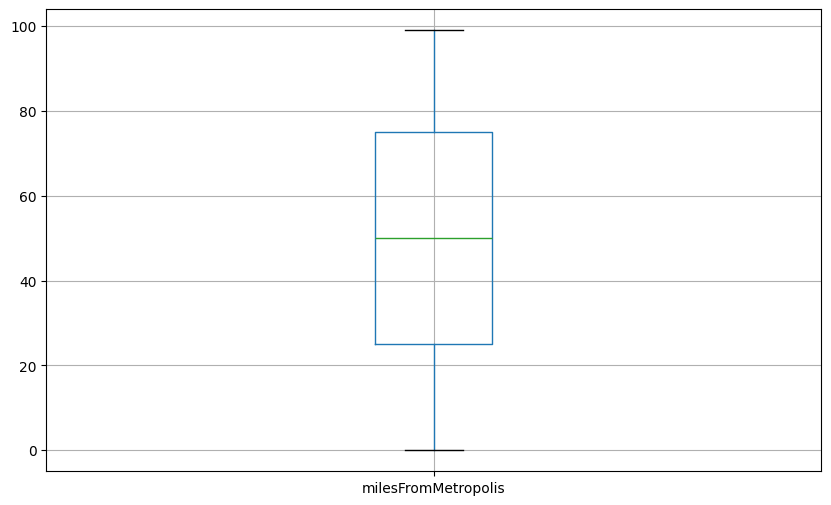

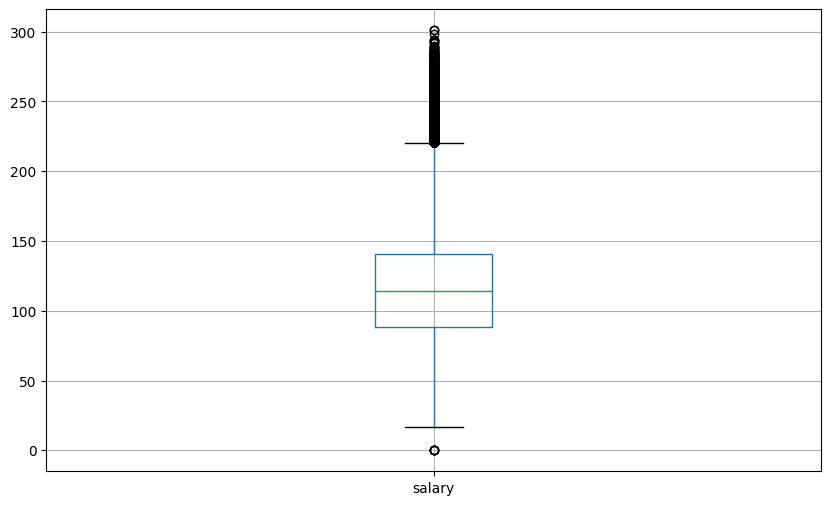

In [45]:
for i in range(len(num_cols)):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=num_cols[i], vert=True)
    plt.show()

From the above box plots,

- <b>For yearsExperience</b>, 
1. 0 - 25% of employees has yearExperience of between range 0 to 6.
2. 25 - 50% of employee has yearExperience between range 6 to 12.
3. 50 - 75% of employee has yearExperience between range 12 to 18.
4. 75 - 100% of employee has yearExperience between range 18 to 24


- <b>For milesFromMetropolis</b>,
1. 0 - 25% of employees has value of milesFromMetropolis between range 0 to 24.
2. 25 - 50% of employee has value of milesFromMetropolis between range 24 to 52.
3. 50 - 75% of employee has value of milesFromMetropolis between range 52 to 76.
4. 75 - 100% of employee has value of milesFromMetropolis between range 76 to 100

- <b>For salary</b>,
1. 25% of employees from dataset has value of salary between range 0 to 88.
2. 25% of employee has value of salary between range 88 to 120.
3. 25% of employee has value of salary between range 120 to 150.
4. 25% of employee has value of salary between range 150 to 300


#### Count Plot

In [46]:
print(num_cols)
print('\n')
print(cat_cols)

['yearsExperience', 'milesFromMetropolis', 'salary']


['jobType', 'degree', 'major', 'industry']


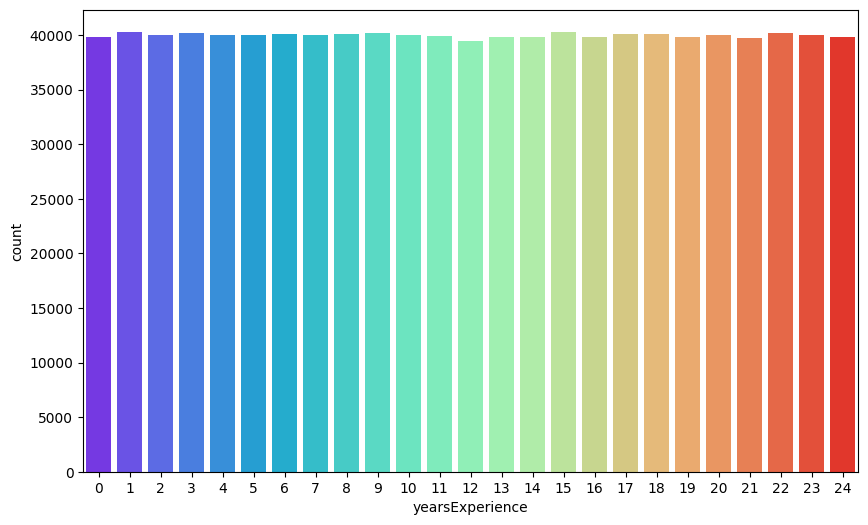

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'yearsExperience', data = df, palette='rainbow')
plt.show()

From the above plot, it is evident that the distribution of yearsExperience is equal over complete dataset.

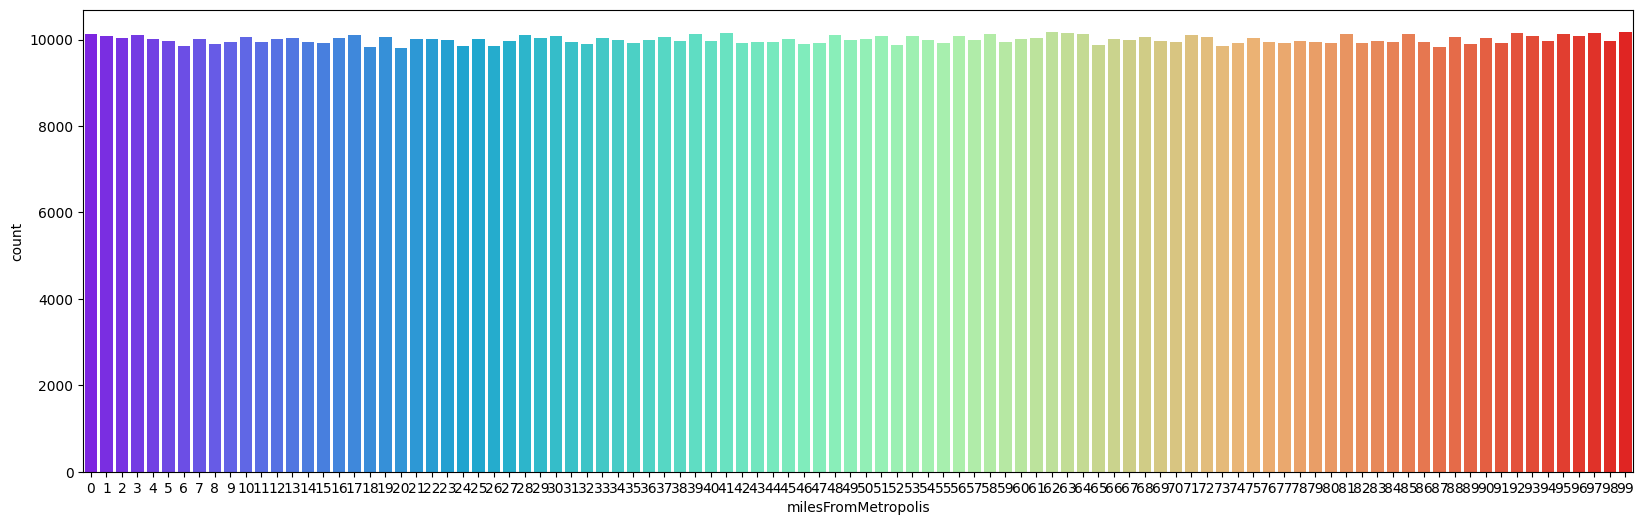

In [56]:
plt.figure(figsize=(20, 6))
sns.countplot(x = 'milesFromMetropolis', data = df, palette='rainbow')
plt.show()

From the above plot, the dristribution of values of milesFromMetropolis is almost equal over comolete dataset.

#### Boxen Plot

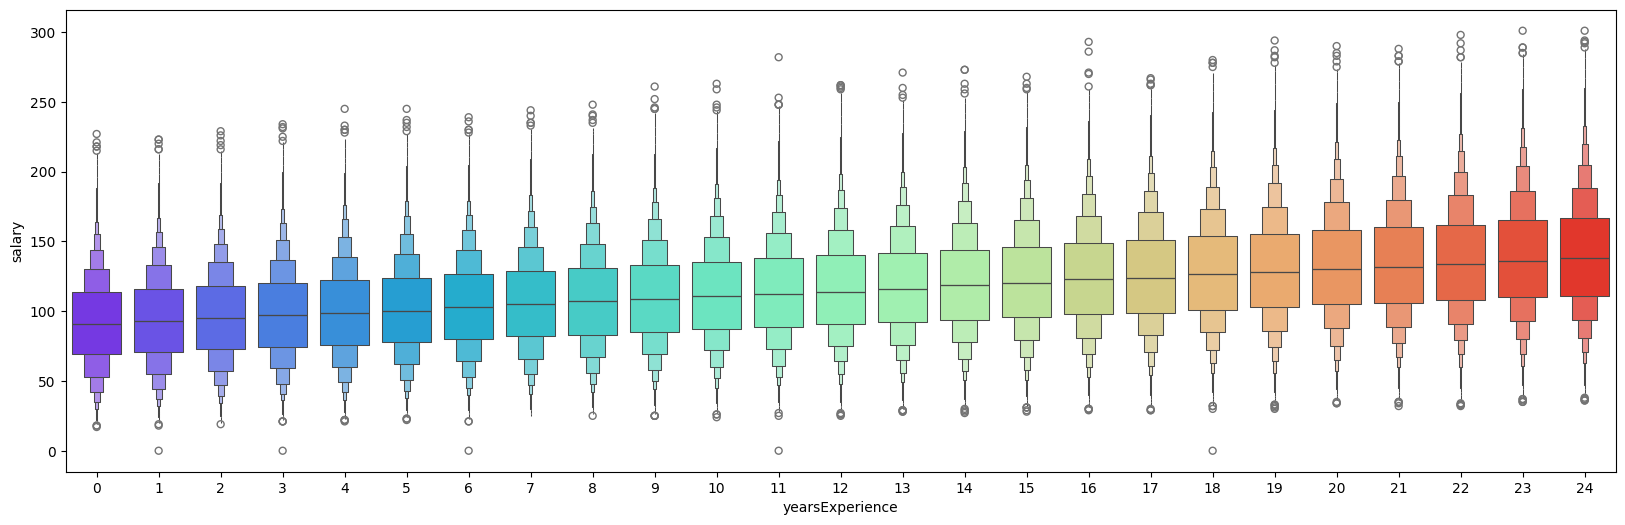

In [57]:
plt.figure(figsize=(20, 6))
sns.boxenplot(x = 'yearsExperience', y = 'salary', data = df, palette='rainbow')
plt.show()

From the above plot, it can be observed that salary increases with increase in yearsExperience.

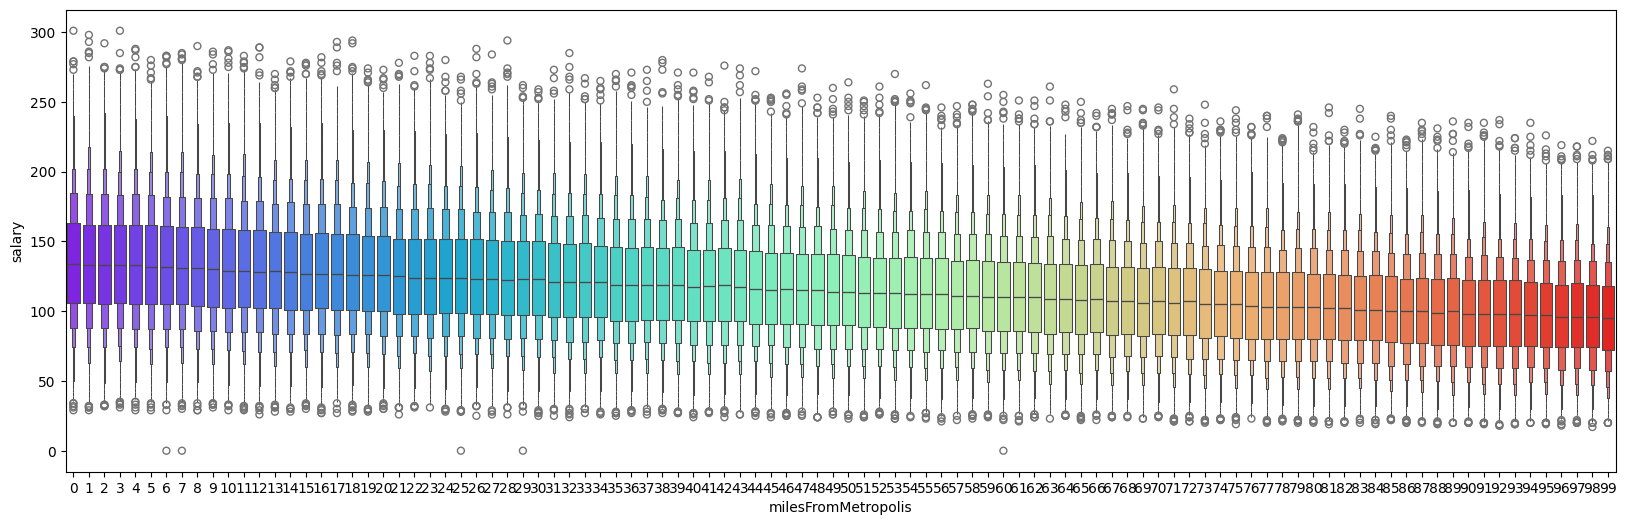

In [58]:
plt.figure(figsize=(20, 6))
sns.boxenplot(x = 'milesFromMetropolis', y = 'salary', data = df, palette='rainbow')
plt.show()

From the above plot, it can be observed that salary decreases with increase in milesFromMetropolis.

#### Line Plot

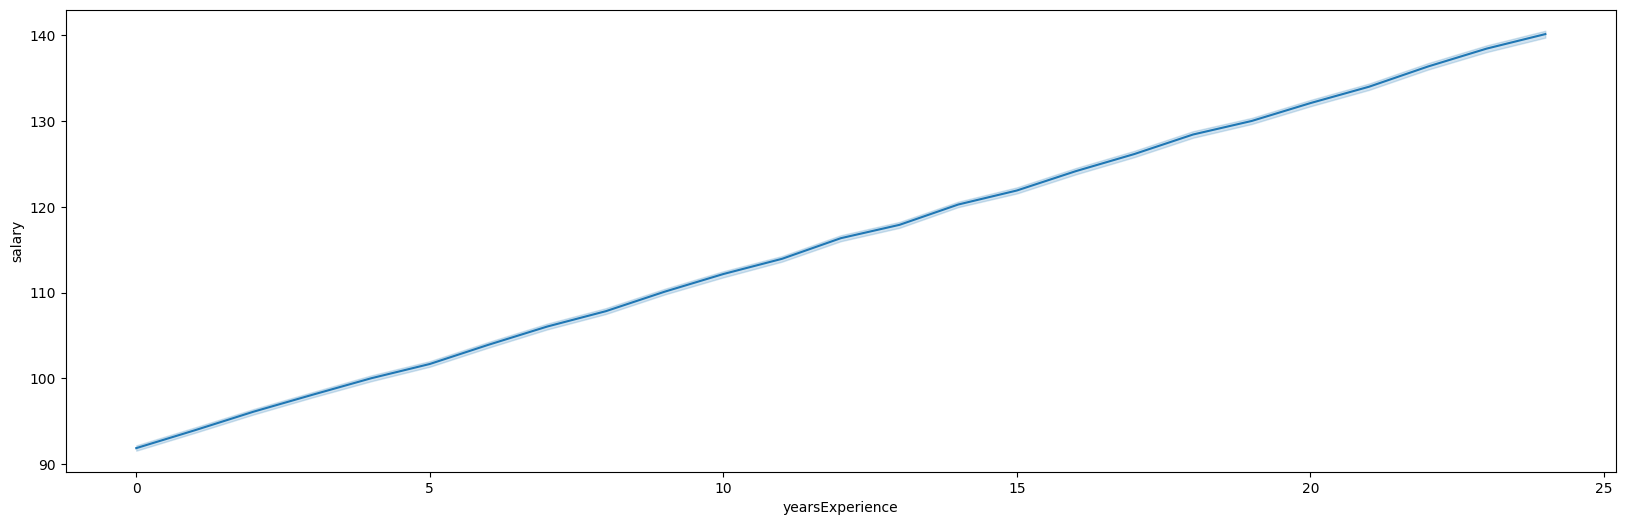

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x = 'yearsExperience', y = 'salary', data = df)
plt.show()

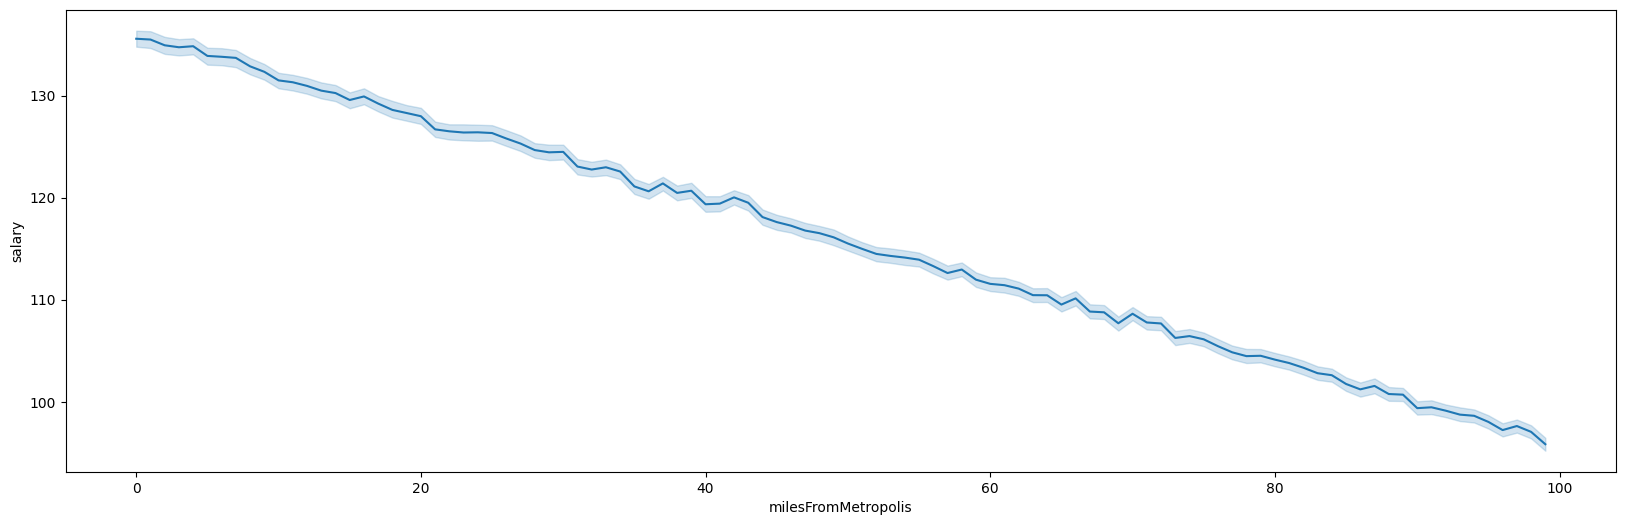

In [60]:
plt.figure(figsize=(20, 6))
sns.lineplot(x = 'milesFromMetropolis', y = 'salary', data = df)
plt.show()

## Variance Inflation Factor

- Variance Inflation Factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in the model. 

- It is used for diagnosing collinearity/multicollinearity

In [61]:
# creating a dataframe for VIF
df_vif = df.drop(['jobType', 'degree', 'major', 'industry', 'salary'], axis = 1)

# target column
target = df['salary']

# numerical columns for VIF
num_cols_vif = num_cols[:-1]
print(num_cols_vif)

['yearsExperience', 'milesFromMetropolis']


In [62]:
import statsmodels.api as sm

In [64]:
# Calculating VIF for each feature
for i in range(0, len(num_cols_vif)):

    # taking one column at a target
    y = df_vif.loc[:, df_vif.columns == num_cols_vif[i]]
    
    # taking all other ramaining columns as features variable
    x = df_vif.loc[:, df_vif.columns != num_cols_vif[i]]

    # fittingthe OLS model on y and x
    model = sm.OLS(y, x)
    results = model.fit()

    # getting the r^2 value of results

    rsq = results.rsquared

    # calculating VIF
    vif = round(1/(1-rsq), 2)

    print("R squared value of {} column is {} keeping all other columns as features: ".format(num_cols_vif[i], (round(rsq, 2))))
    print("Variance Inflation Factor of {} column is {}\n".format(num_cols_vif[i], vif))
    print('\n')

R squared value of yearsExperience column is 0.55 keeping all other columns as features: 
Variance Inflation Factor of yearsExperience column is 2.21



R squared value of milesFromMetropolis column is 0.55 keeping all other columns as features: 
Variance Inflation Factor of milesFromMetropolis column is 2.21





Observations:

- There is colinearity/multicolinearity between  variables as the VIF value is almost upto 2.21

- yearsExperience and milesFromMetropolis both have colinearity with all the variables.

### ANOVA Test

#### Normality Assumption Check

Before conducting the hypothesis test, it is essential to verify whether the assumptions for the one-way ANOVA test are met. Firstly, ensure that the samples are random and independent. Next, assess the normality assumption by plotting normal probability plots (Q-Q plots) for each grouped variable to determine if the data follows a normal distribution.

#### Hypothesis Testing

1. Null Hypothesis (H₀): The means of the six salary groups are equal:
- H₀: μ₁= μ₂ = μ₃ = … = μ₆

2. Alternative Hypothesis (H₁): At least one of the salary means differs:
Not all salary means are equal.
- H₁: Not all salary means are equal

3. Significance Level (α): 0.05 (5%).

4. Test Statistic: Based on the F-test statistic calculated in the one-way ANOVA, we compare the test statistic value to the critical value at α = 0.05 (or use the p-value approach).

5. Decision Rule:
- If the p-value ≤ α, reject the null hypothesis (H₀).
- If the p-value > α, fail to reject the null hypothesis (H₀).

In [66]:
from scipy import stats

In [70]:
# Perform ANOVA test between variables
def perform_anova_test(x, y):
    # two variables of interest
    df_anova = df[[x, y]]
    groups = df_anova.groupby(x).count().reset_index()
    print(groups)

    unique_majors = df_anova[x].unique()
    for major in unique_majors:
        stats.probplot(df_anova[df_anova[x] == major][y], dist = 'norm', plot = plt)
        plt.title("Probability Plot for {} column".format(major))
        plt.show()

    # calculate ratio of the largest to the smallest sample standard deviation
    ratio = df_anova.groupby(x).std().max()/df_anova.groupby(x).std().min()
    print("\n Ratio of the largest to the smallest sample standard deviation: ", ratio)

    # Create ANOVA backbone table
    data =  [["Between Groups", '', '', '', '', '', ''], ["Within Groups", '', '', '', '', '', ''], ["Total", '', '', '', '', '', '']]
    anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F-critical']) # ss = sum of squares, df = degrees of freedom, ms = mean sum of square
    anova_table.set_index('Source of Variation', inplace = True)


    # Calculate the SSB and update the ANOVA table
    x_bar = df_anova[y].mean()
    SSB = df_anova.groupby(x).count()*(df_anova.groupby(x).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSB[y].sum()

    # Calculate the SSW and update the ANOVA table
    SSW = (df_anova.groupby(x).count() - 1) * df_anova.groupby(x).std()**2
    anova_table['SS']['Within Groups'] = SSW[y].sum()

    # Calculate the SST and update the ANOVA table
    SST = SSB[y].sum() + SSW[y].sum()
    anova_table['SS']['Total'] = SST

    
    # Update the degrees of freedom
    anova_table['df']['Between Groups'] = df_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = df_anova.shape[0] - df_anova[x].nunique()
    anova_table['df']['Total'] = df_anova.shape[0] - 1

    # Calculate MS
    anova_table['MS'] = anova_table['SS']/anova_table['df']

    # Calculate F
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F

    # Calculate P-value
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # Calculate F-critical
    alpha = 0.05
    # Possible types: 'right-tailed, left-tailed, two-tailed'
    tail_hypothesis_type = "two-tailed"
    if tail_hypothesis_type == "right-tailed":
        alpha /=2
    anova_table['F-critical']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # Print ANOVA Table
    print(anova_table)

    # The P-value approach
    print("Approach 1: The P-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] < alpha:
        conclusion = "Reject the null hypothesis."
    print("\nF-score is:", anova_table['F']['Between Groups'], " and P-value is:", anova_table['P-value']['Between Groups'])
    print(conclusion)


    # The Critical Value approach
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The Critical Value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['F']['Between Groups'] > anova_table['F-critical']['Between Groups']:
        conclusion = "Reject the null hypothesis."
    print("\nF-score is:", anova_table['F']['Between Groups'], " and F-critical is:", anova_table['F-critical']['Between Groups'])
    print(conclusion)


         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410


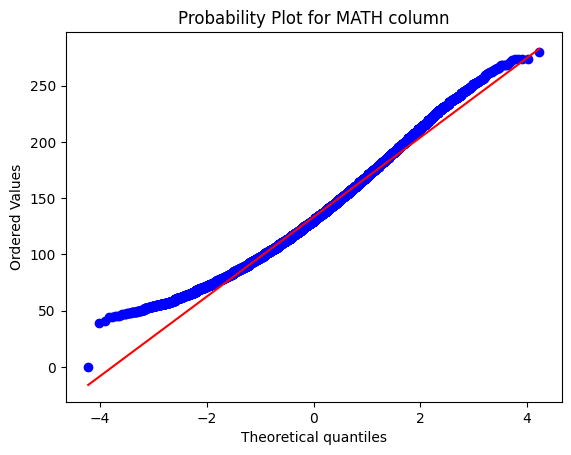

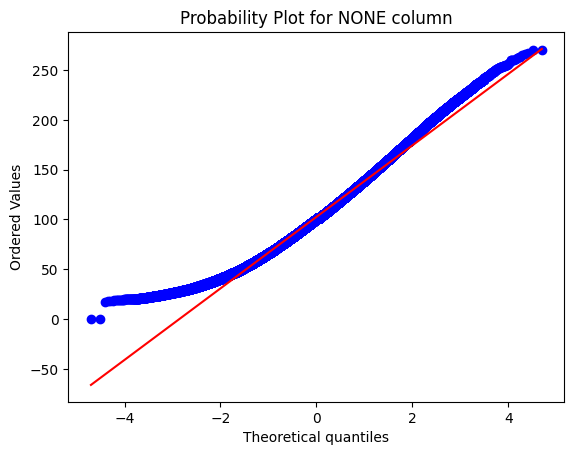

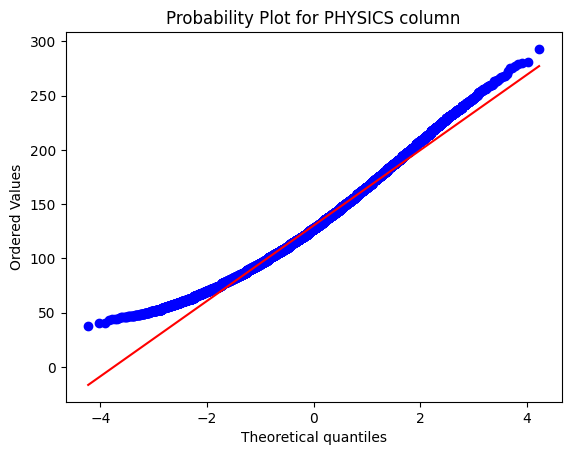

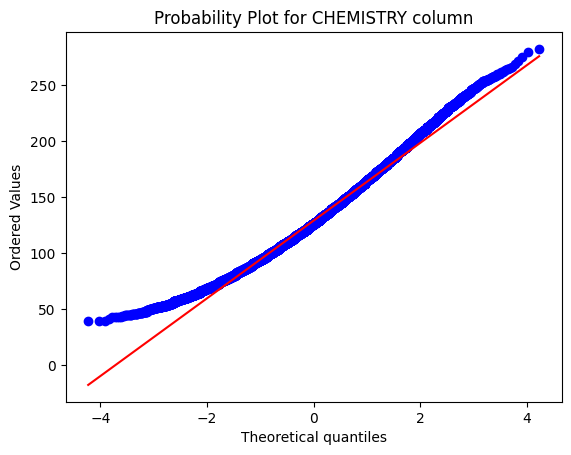

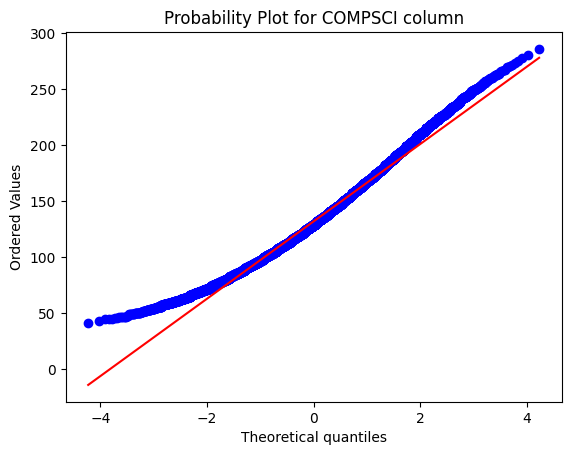

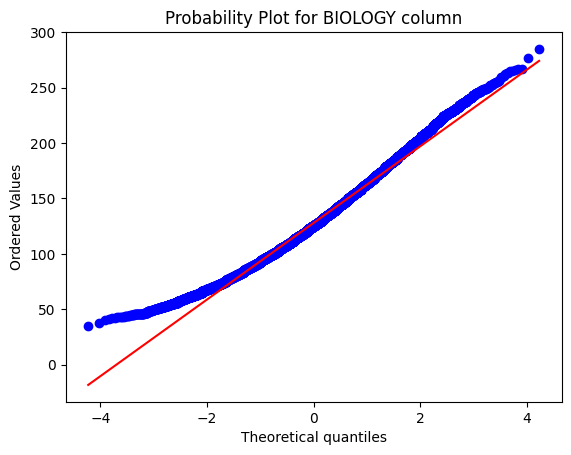

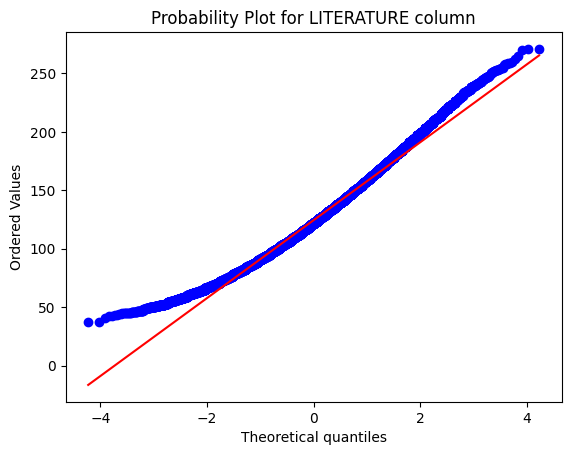

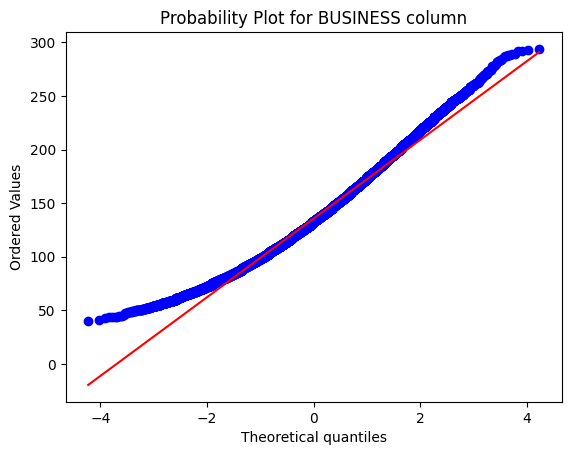

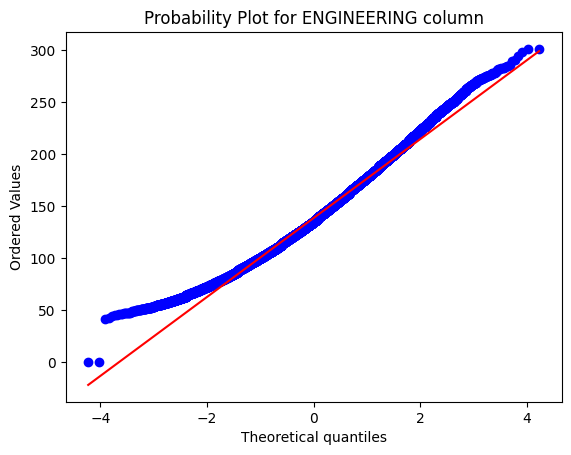


 Ratio of the largest to the smallest sample standard deviation:  salary    1.137312
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        214940060.760225       8  26867507.595028  20922.428835   
Within Groups        1284137037.774666  999991      1284.148595                 
Total                1499077098.534891  999999      1499.078598                 

                    P-value F-critical  
Source of Variation                     
Between Groups          0.0   1.938423  
Within Groups                           
Total                                   
Approach 1: The P-value approach to hypothesis testing in the decision rule

F-score is: 20922.428835180388  and P-value is: 1.1102230246251565e-16
Reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The Critical

In [71]:
# Perform ANOVA test between major and salary
perform_anova_test('major', 'salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125046
3         JANITOR  124971
4          JUNIOR  124594
5         MANAGER  125121
6          SENIOR  125886
7  VICE_PRESIDENT  125235


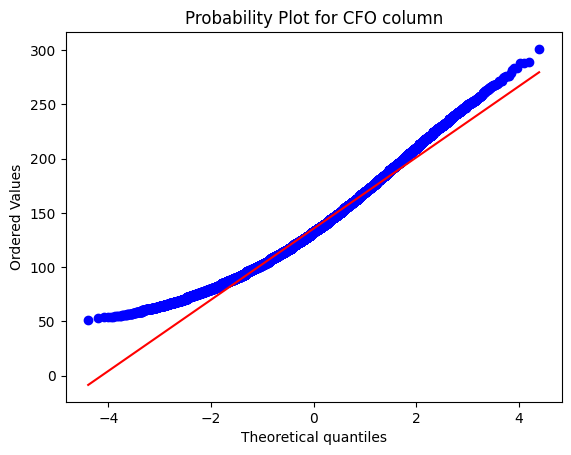

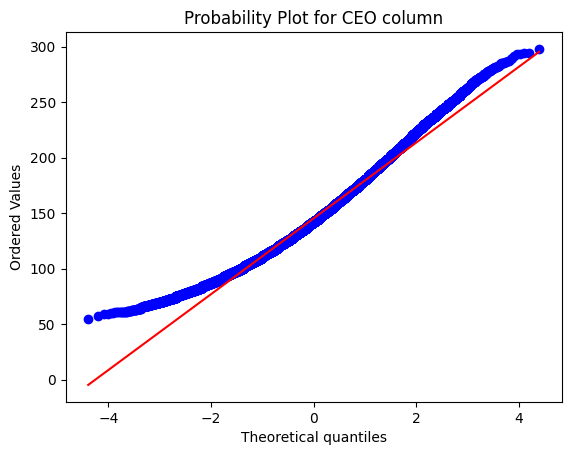

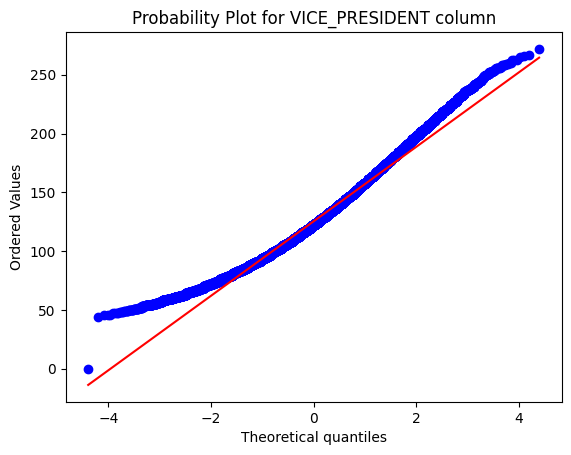

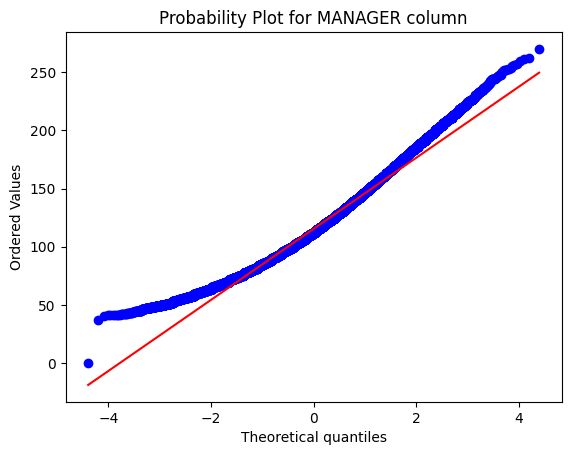

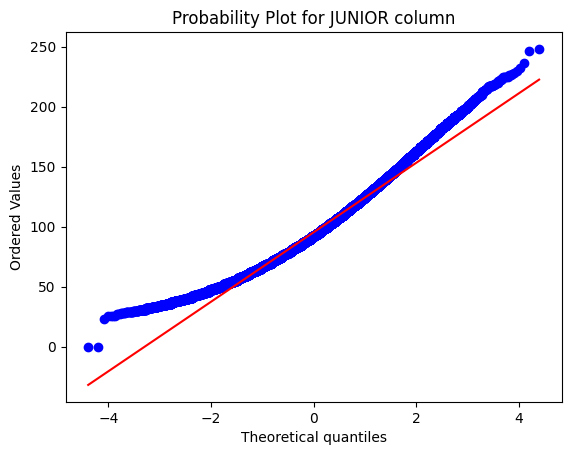

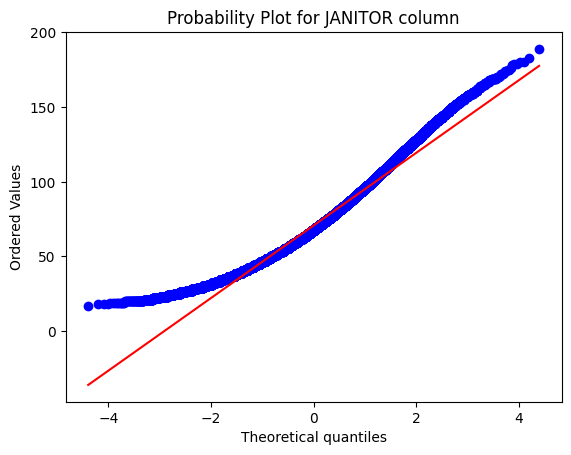

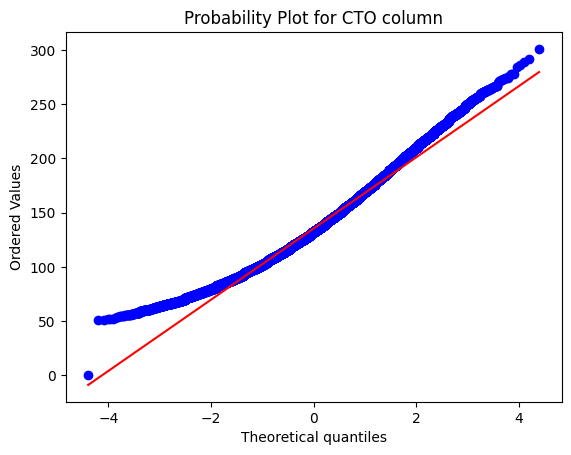

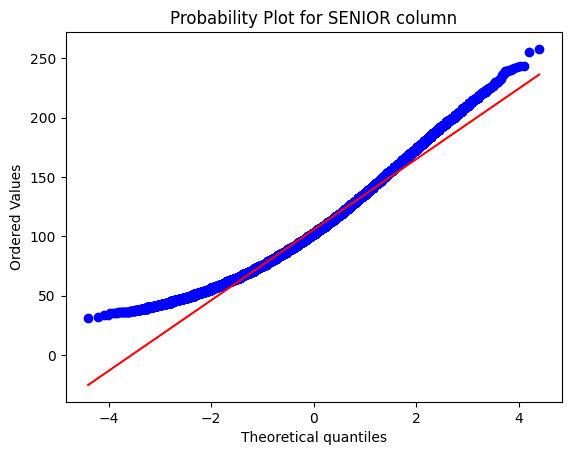


 Ratio of the largest to the smallest sample standard deviation:  salary    1.3969
dtype: float64
                                    SS      df              MS             F  \
Source of Variation                                                            
Between Groups        535091060.072659       7  76441580.01038  79296.758903   
Within Groups         963986038.462213  999992       963.99375                 
Total                1499077098.534871  999999     1499.078598                 

                    P-value F-critical  
Source of Variation                     
Between Groups          0.0   2.009601  
Within Groups                           
Total                                   
Approach 1: The P-value approach to hypothesis testing in the decision rule

F-score is: 79296.75890294144  and P-value is: 1.1102230246251565e-16
Reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The Critical Value a

In [72]:
# Perform ANOVA test between jobType and salary
perform_anova_test('jobType', 'salary') 

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175364
2  HIGH_SCHOOL  236976
3      MASTERS  175311
4         NONE  236854


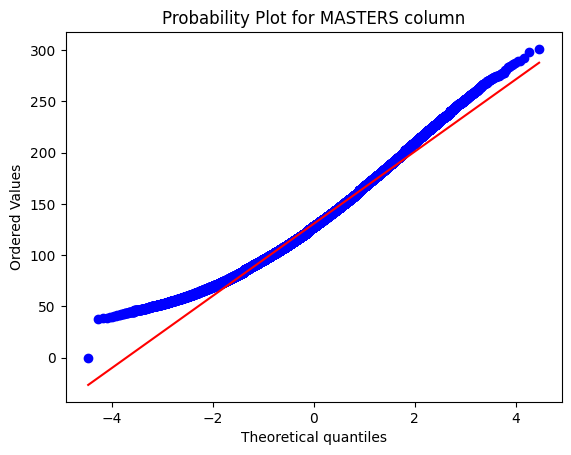

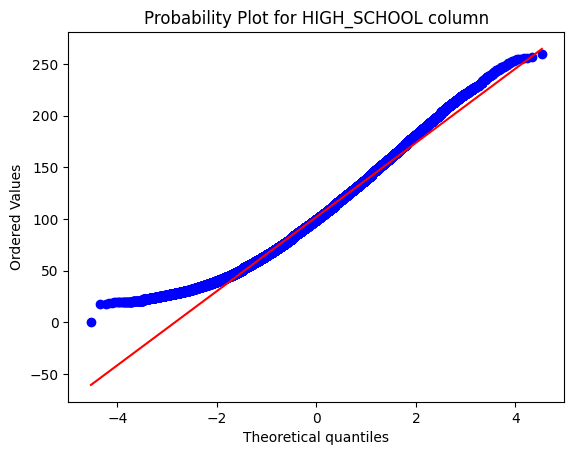

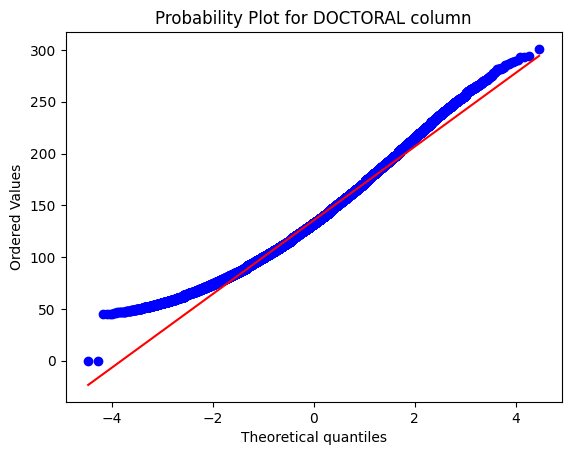

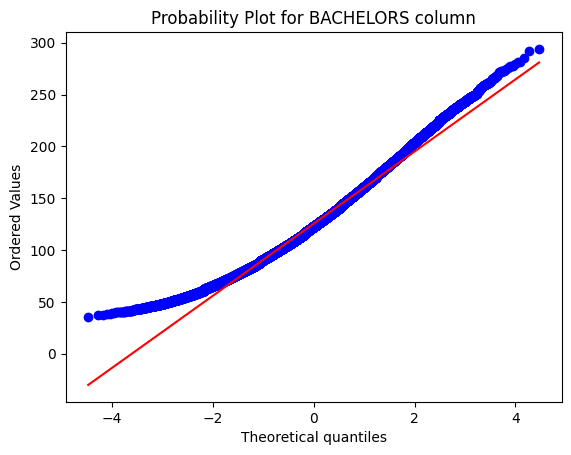

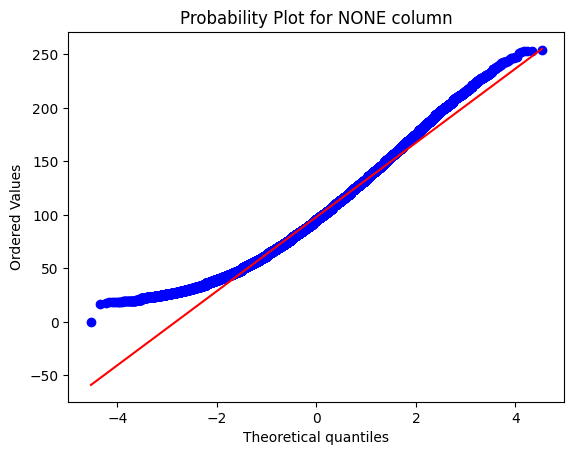


 Ratio of the largest to the smallest sample standard deviation:  salary    1.034299
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        241396422.297586       4  60349105.574396  47984.202166   
Within Groups        1257680676.237301  999995      1257.686965                 
Total                1499077098.534887  999999      1499.078598                 

                    P-value F-critical  
Source of Variation                     
Between Groups          0.0   2.371941  
Within Groups                           
Total                                   
Approach 1: The P-value approach to hypothesis testing in the decision rule

F-score is: 47984.20216602098  and P-value is: 1.1102230246251565e-16
Reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The Critical 

In [73]:
# Perform ANOVA test between degree and salary
perform_anova_test('degree', 'salary')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125046
3         JANITOR           124971
4          JUNIOR           124594
5         MANAGER           125121
6          SENIOR           125886
7  VICE_PRESIDENT           125235


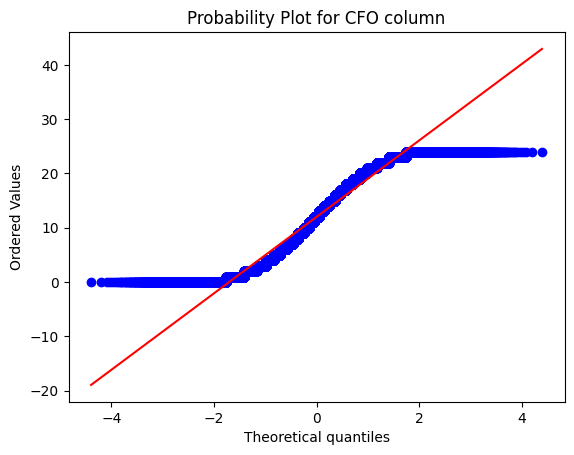

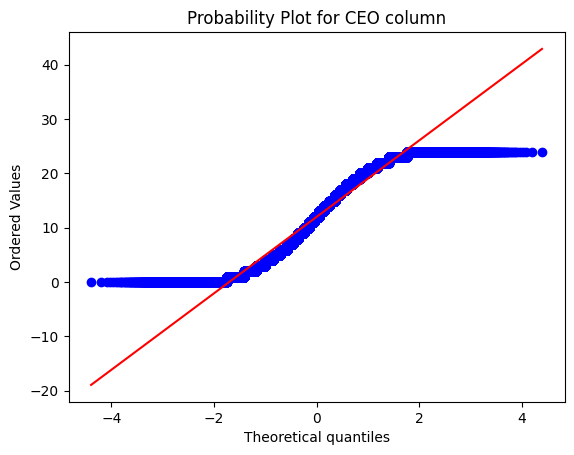

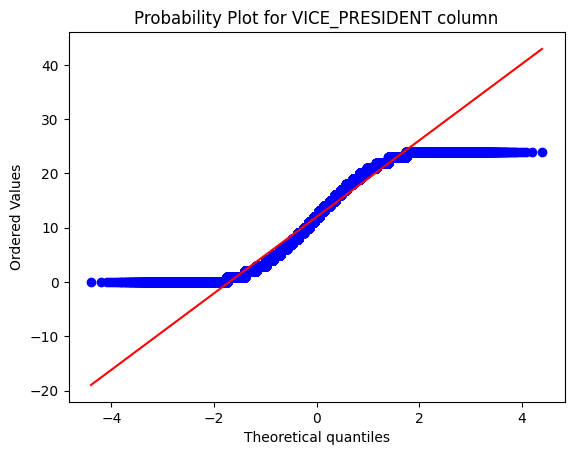

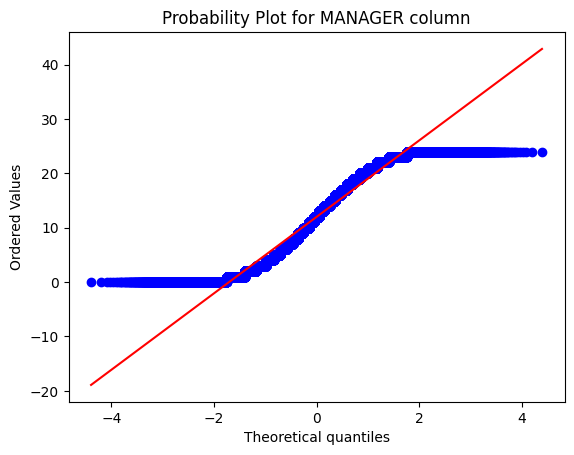

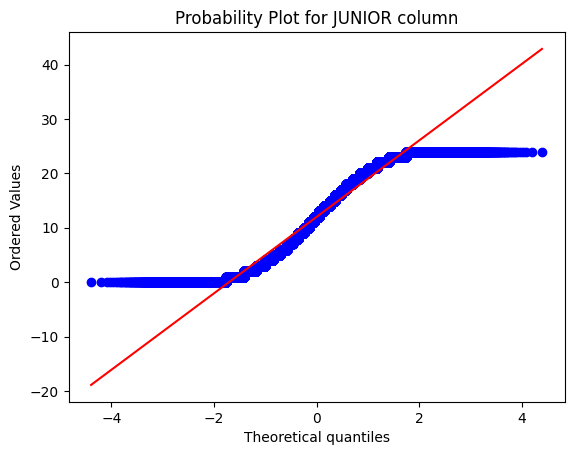

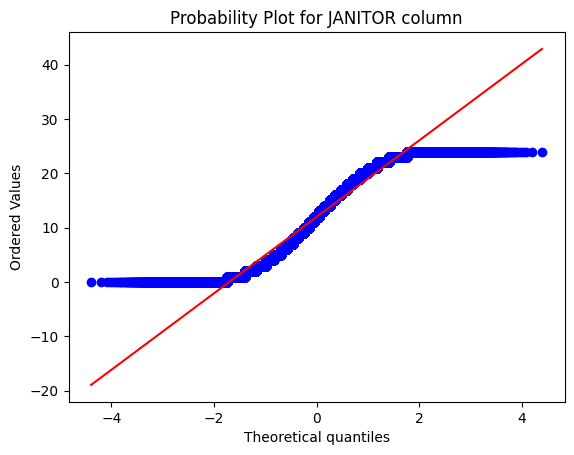

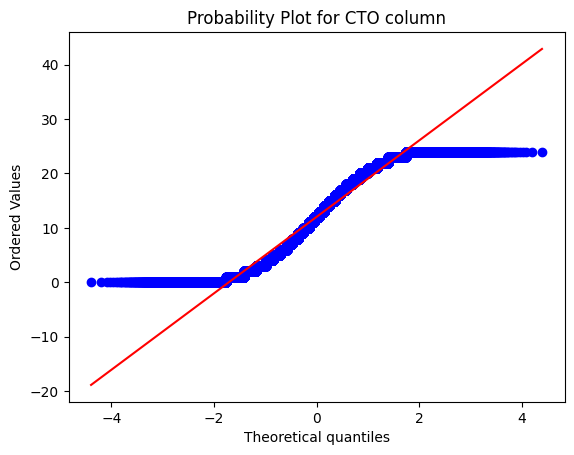

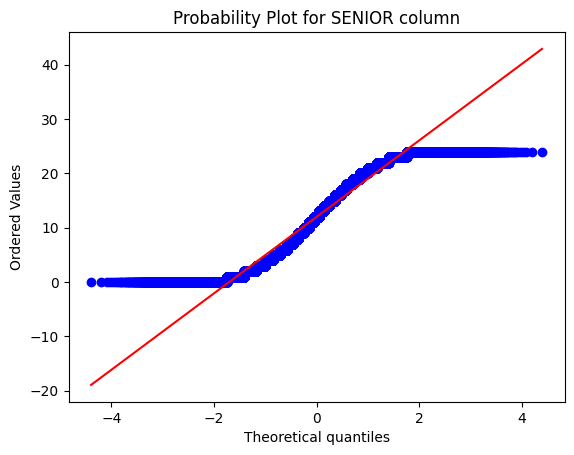


 Ratio of the largest to the smallest sample standard deviation:  yearsExperience    1.002522
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            117.457034       7  16.779576  0.322567  0.944194   
Within Groups        52018412.569971  999992  52.018829                       
Total                52018530.027004  999999  52.018582                       

                    F-critical  
Source of Variation             
Between Groups        2.009601  
Within Groups                   
Total                           
Approach 1: The P-value approach to hypothesis testing in the decision rule

F-score is: 0.3225673597094048  and P-value is: 0.9441941901986974
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The Critical Value approach to hypothesis testi

In [74]:
# Perform ANOVA test between jobType and yearsExperience
perform_anova_test('jobType', 'yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175364
2  HIGH_SCHOOL           236976
3      MASTERS           175311
4         NONE           236854


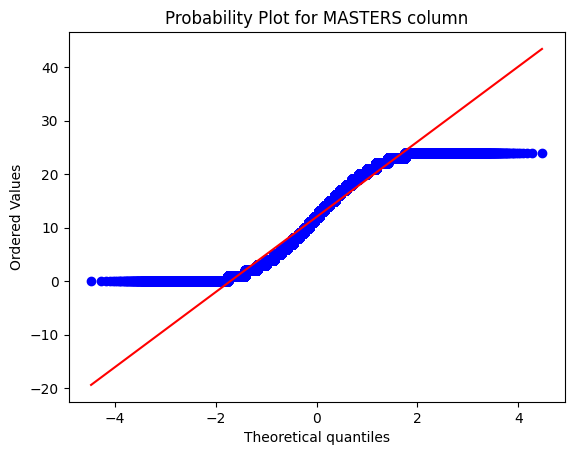

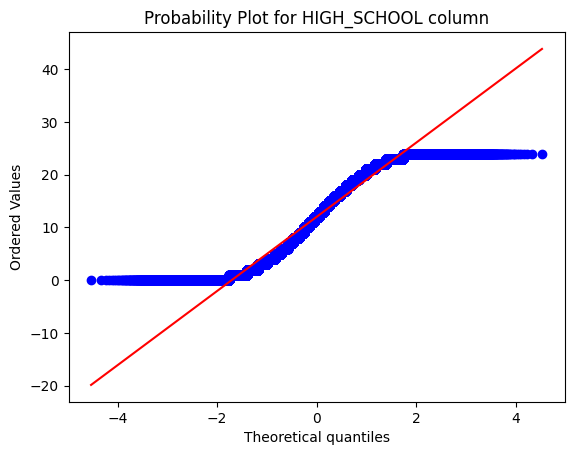

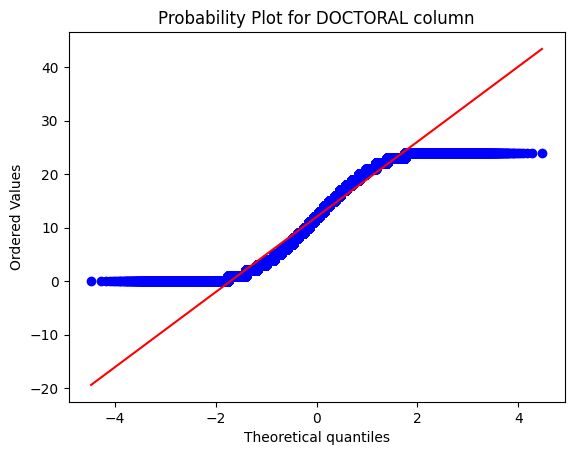

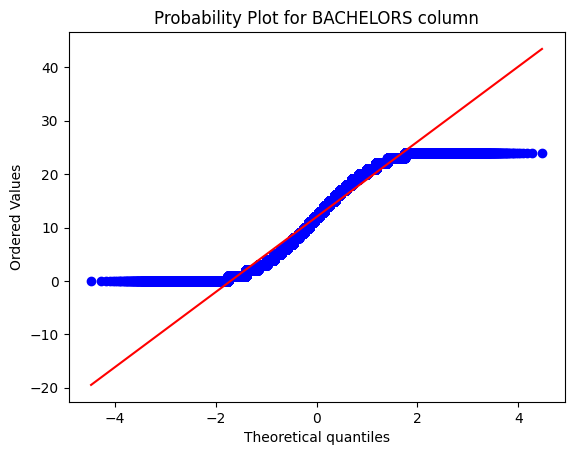

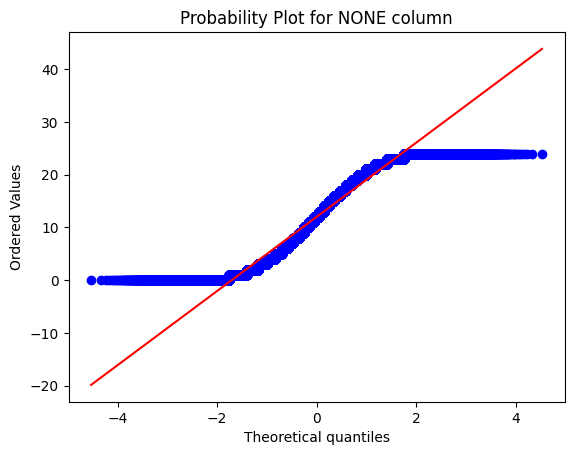


 Ratio of the largest to the smallest sample standard deviation:  yearsExperience    1.002005
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups             40.221125       4  10.055281  0.193301  0.942004   
Within Groups         52018489.80588  999995   52.01875                       
Total                52018530.027004  999999  52.018582                       

                    F-critical  
Source of Variation             
Between Groups        2.371941  
Within Groups                   
Total                           
Approach 1: The P-value approach to hypothesis testing in the decision rule

F-score is: 0.19330109231773057  and P-value is: 0.9420038025970138
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The Critical Value approach to hypothesis test

In [75]:
# Perform ANOVA test between degree and yearsExperience
perform_anova_test('degree', 'yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58596
5   LITERATURE            58684
6         MATH            57801
7         NONE           532355
8      PHYSICS            58410


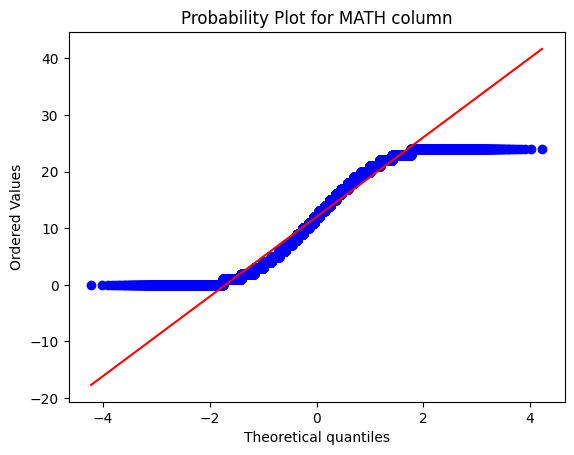

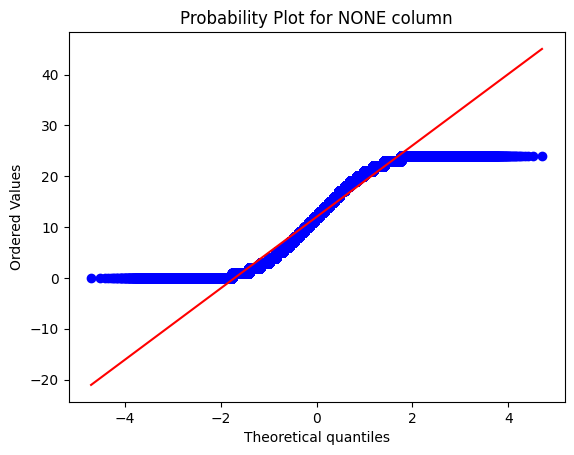

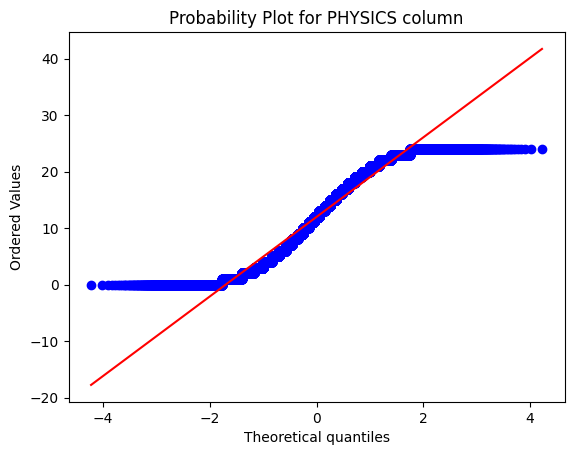

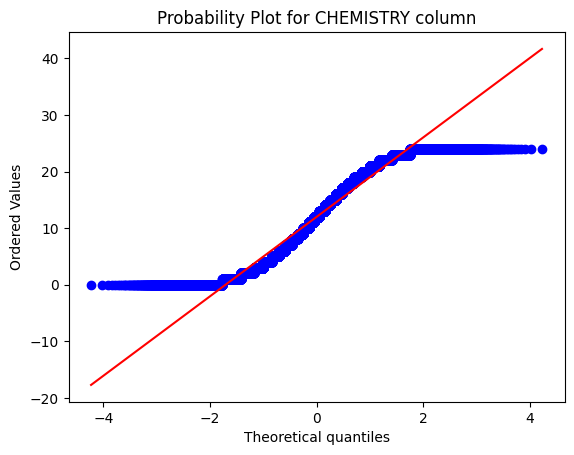

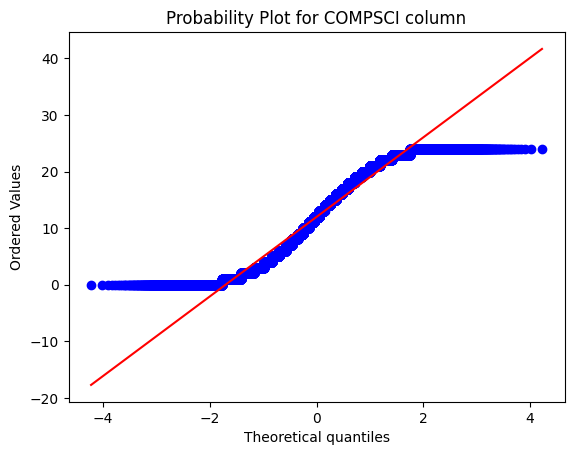

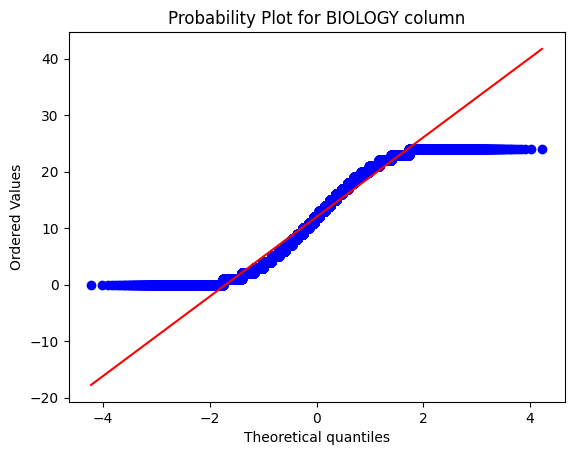

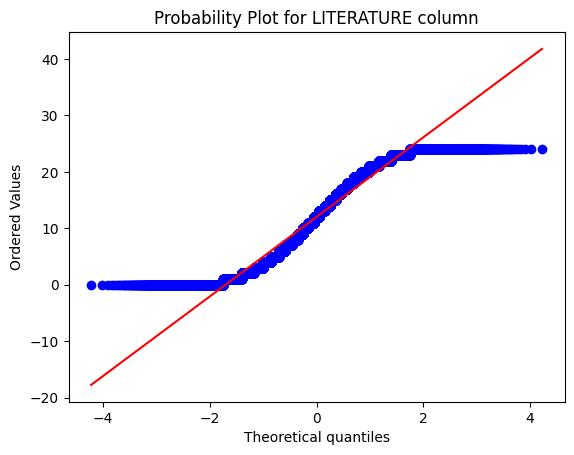

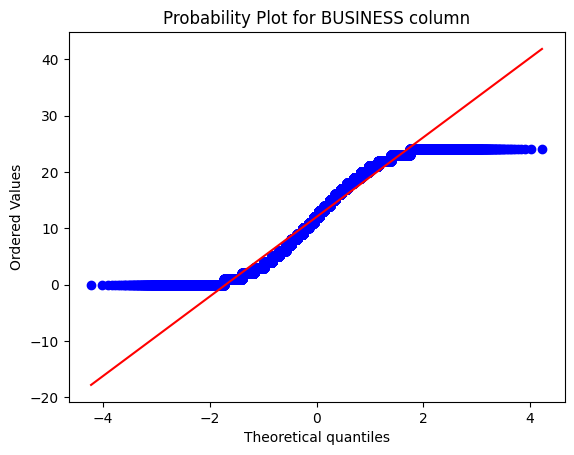

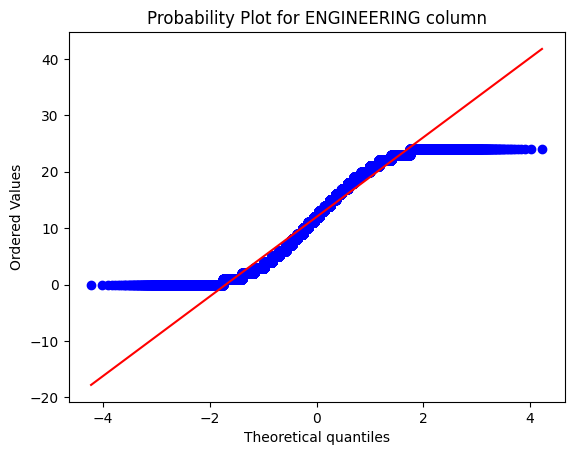


 Ratio of the largest to the smallest sample standard deviation:  yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups             73.972363       8   9.246545  0.177753  0.993928   
Within Groups        52018456.054641  999991  52.018924                       
Total                52018530.027005  999999  52.018582                       

                    F-critical  
Source of Variation             
Between Groups        1.938423  
Within Groups                   
Total                           
Approach 1: The P-value approach to hypothesis testing in the decision rule

F-score is: 0.17775349187267195  and P-value is: 0.9939281417130893
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The Critical Value approach to hypothesis test

In [76]:
# Perform ANOVA test between major and yearsExperience
perform_anova_test('major', 'yearsExperience')

    industry  yearsExperience
0       AUTO           142943
1  EDUCATION           142819
2    FINANCE           142867
3     HEALTH           142755
4        OIL           142771
5    SERVICE           142639
6        WEB           143206


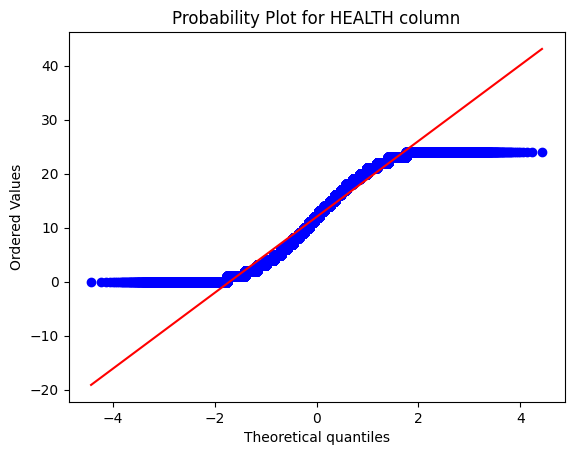

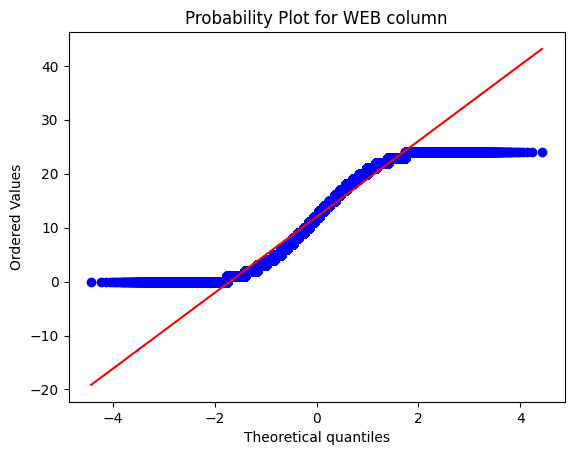

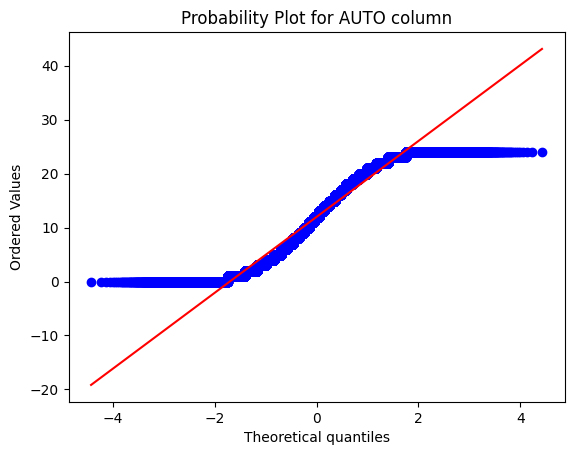

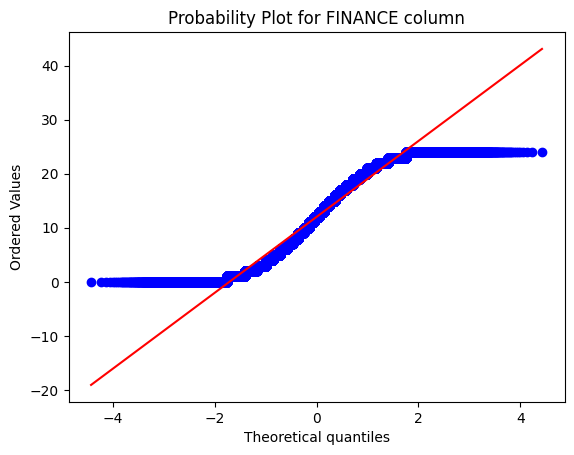

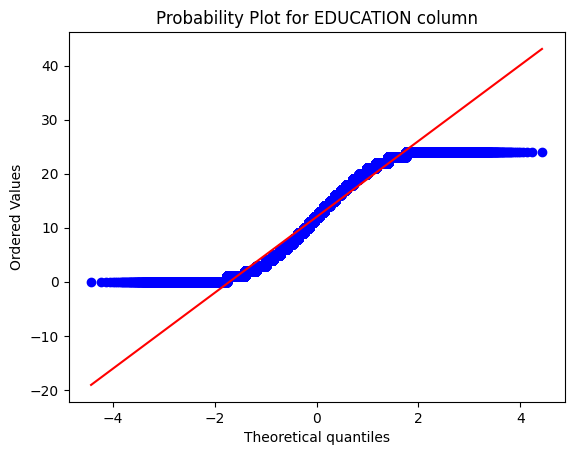

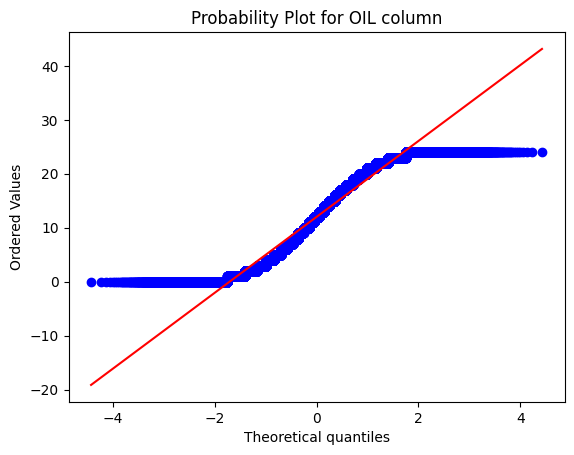

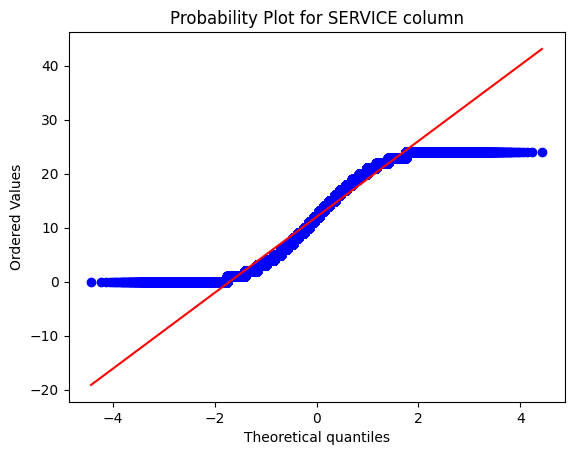


 Ratio of the largest to the smallest sample standard deviation:  yearsExperience    1.002384
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            182.340098       6  30.390016  0.584213  0.743267   
Within Groups        52018347.686906  999993  52.018712                       
Total                52018530.027004  999999  52.018582                       

                    F-critical  
Source of Variation             
Between Groups        2.098607  
Within Groups                   
Total                           
Approach 1: The P-value approach to hypothesis testing in the decision rule

F-score is: 0.5842131652958172  and P-value is: 0.7432671010723688
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The Critical Value approach to hypothesis testi

In [78]:
# Perform ANOVA test between industry and yearsExperience
perform_anova_test('industry', 'yearsExperience')

### Dendrogram

Here's an improved version of your description:
A dendrogram is a visual representation of compound correlation data, designed to illustrate the hierarchical relationships between compounds. The individual compounds, referred to as leaf nodes, are arranged along the base of the dendrogram. Clusters of compounds are formed by successively joining individual compounds or pre-existing clusters, with each connection point referred to as a node.

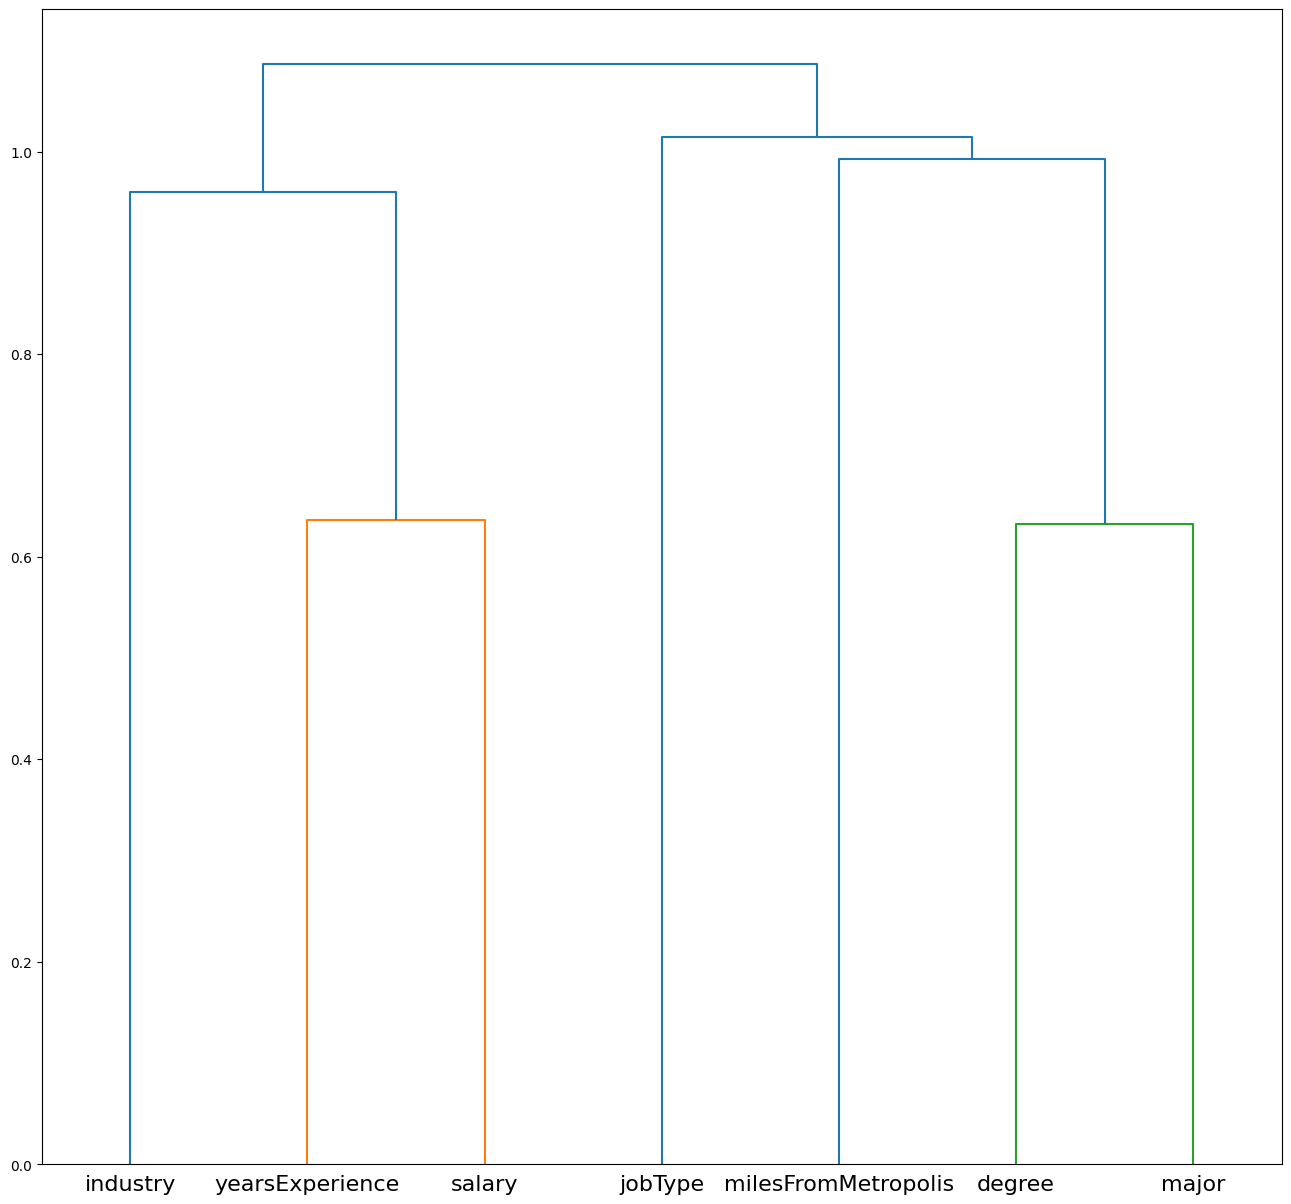

In [82]:
X = df[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method = 'average')
fig = plt.figure(figsize = (16, 15))
dendrogram = hc.dendrogram(z, labels = X.columns, orientation = 'top', leaf_font_size = 16)
plt.show()

Observation:

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

### Since there are no missing values and the data points are evenly distributed, we can confidently proceed to the next step

In [85]:
df.to_csv('data/processed_data.csv', index=False)